<a href="https://colab.research.google.com/github/AslanDevbrat/Geoinformatics/blob/main/Geo_assig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Geoinformatics/Lab/Data.zip


Archive:  /content/drive/MyDrive/Geoinformatics/Lab/Data.zip
  inflating: Bhopal_Mask.zip         
  inflating: LC08_L1TP_146044_20201226_20201226_01_RT.tar.gz  
  inflating: LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz  


In [2]:
!unzip /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz

Archive:  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz or
        /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.zip, and cannot find /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.ZIP, period.


In [9]:
!mkdir L7
!tar -xvf  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz -C /content/L7

mkdir: cannot create directory ‘L7’: File exists
LE07_L1TP_145044_20021210_20170127_01_T1_ANG.txt
LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B3.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B4.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B5.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B7.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B8.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_BQA.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_GCP.txt
LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt
README.GTF


In [10]:
!mkdir L8
!tar -xvf  /content/LC08_L1TP_146044_20201226_20201226_01_RT.tar.gz -C /content/L8

LC08_L1TP_146044_20201226_20201226_01_RT_B1.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B2.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B3.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B4.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B5.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B6.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B7.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B8.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B9.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B10.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B11.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_BQA.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_ANG.txt
LC08_L1TP_146044_20201226_20201226_01_RT_MTL.txt


In [11]:
!unzip Bhopal_Mask.zip

Archive:  Bhopal_Mask.zip
   creating: Bhopal_Mask/
  inflating: Bhopal_Mask/Bhopal_Mask.cpg  
  inflating: Bhopal_Mask/Bhopal_Mask.dbf  
  inflating: Bhopal_Mask/Bhopal_Mask.prj  
  inflating: Bhopal_Mask/Bhopal_Mask.sbn  
  inflating: Bhopal_Mask/Bhopal_Mask.sbx  
  inflating: Bhopal_Mask/Bhopal_Mask.shp  
  inflating: Bhopal_Mask/Bhopal_Mask.shx  


In [12]:
!pip install elevation
!pip install richdem
!pip install pysheds
!pip install plantcv
!apt install imagemagick

     |████████████████████████████████| 71kB 3.2MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 4.3MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 6.5MB 5.5MB/s 
     |████████████████████████████████| 19.1MB 238kB/s 
  Created wheel for pysheds: filename=pysheds-0.2.7-cp36-none-any.whl size=51838 sha256=4c72d8c1f8034d2d7df3bbb3248cfc8b30d5142c2054cf241dd98283b78b6706
  Stored in directory: /root/.cache/pip/wheels/e4/87/6f/f67cbfbc39ea2c76e0cb801c37590b9e3c47e9eee7baea2547
Successfully built pysheds
     |████████████████████████████████| 215kB 4.2MB/s 
     |████████████████████████████████| 48.6MB 88kB/s 
     |████████████████████████████████| 675kB 52.6MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
  C

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

## Working with Landsat 7 data

In [2]:
gdal_data = gdal.Open('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF')
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

In [3]:
nodataval

In [4]:
data_array = gdal_data.ReadAsArray().astype(np.float)
np.amin(data_array)

0.0

In [5]:
# replace missing values if necessary
if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan

In [6]:
np.unique(data_array)
np.unique(data_array)

array([ 1.,  2.,  3., ..., nan, nan, nan])

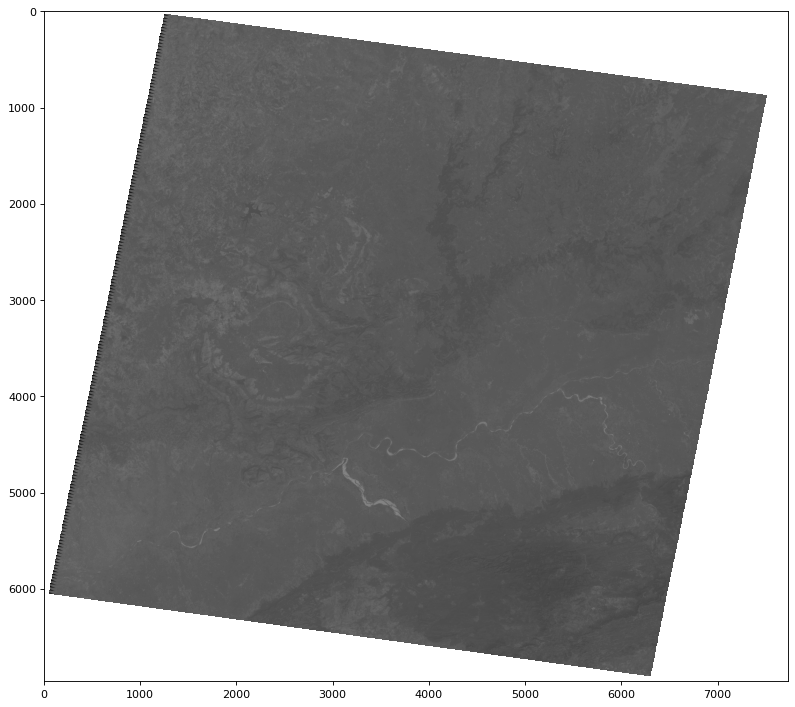

In [7]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(data_array,cmap='gray')

## DN to radiance

### Gain and Bias Method
 - L = (DN * G) + B

In [8]:
"""
  Creating a  Dictionary with key as the "property" and value as 
  numerical value given in the file.
  example  {'REFLECTANCE_MULT_BAND_7 ': ' 1.6439E-03'}
"""

Landsat7_mlt_dict = {}
with open('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt', 'r') as _:
    for line in _:
        line = line.strip()
        if line != 'END':
            key, value = line.split('=')
            Landsat7_mlt_dict[key] = value
print( Landsat7_mlt_dict)

{'GROUP ': ' PROJECTION_PARAMETERS', 'ORIGIN ': ' "Image courtesy of the U.S. Geological Survey"', 'REQUEST_ID ': ' "0501701260854_12305"', 'LANDSAT_SCENE_ID ': ' "LE71450442002344SGS00"', 'LANDSAT_PRODUCT_ID ': ' "LE07_L1TP_145044_20021210_20170127_01_T1"', 'COLLECTION_NUMBER ': ' 01', 'FILE_DATE ': ' 2017-01-27T07:00:32Z', 'STATION_ID ': ' "SGS"', 'PROCESSING_SOFTWARE_VERSION ': ' "LPGS_12.8.3"', 'DATA_CATEGORY ': ' "NOMINAL"', 'END_GROUP ': ' L1_METADATA_FILE', 'DATA_TYPE ': ' "L1TP"', 'COLLECTION_CATEGORY ': ' "T1"', 'ELEVATION_SOURCE ': ' "GLS2000"', 'OUTPUT_FORMAT ': ' "GEOTIFF"', 'EPHEMERIS_TYPE ': ' "DEFINITIVE"', 'SPACECRAFT_ID ': ' "LANDSAT_7"', 'SENSOR_ID ': ' "ETM"', 'SENSOR_MODE ': ' "SAM"', 'WRS_PATH ': ' 145', 'WRS_ROW ': ' 044', 'DATE_ACQUIRED ': ' 2002-12-10', 'SCENE_CENTER_TIME ': ' "05:02:30.1232290Z"', 'CORNER_UL_LAT_PRODUCT ': ' 24.07386', 'CORNER_UL_LON_PRODUCT ': ' 76.89248', 'CORNER_UR_LAT_PRODUCT ': ' 24.02871', 'CORNER_UR_LON_PRODUCT ': ' 79.17007', 'CORNER_LL

In [9]:
channel_gain = float(Landsat7_mlt_dict['RADIANCE_MULT_BAND_1 '])
channel_offset = float(Landsat7_mlt_dict['RADIANCE_ADD_BAND_1 '])
#print(type(channel_gain))
print(f"value of G {channel_gain}")
print(f"value of B {channel_offset}")

value of G 0.77874
value of B -6.97874


In [10]:
new_data_array = np.empty_like(data_array)
for i,row in enumerate(data_array):
  for j, col in enumerate(row):
    if data_array[i][j] != np.nan:
      new_data_array[i][j] = data_array[i][j] * channel_gain +channel_offset

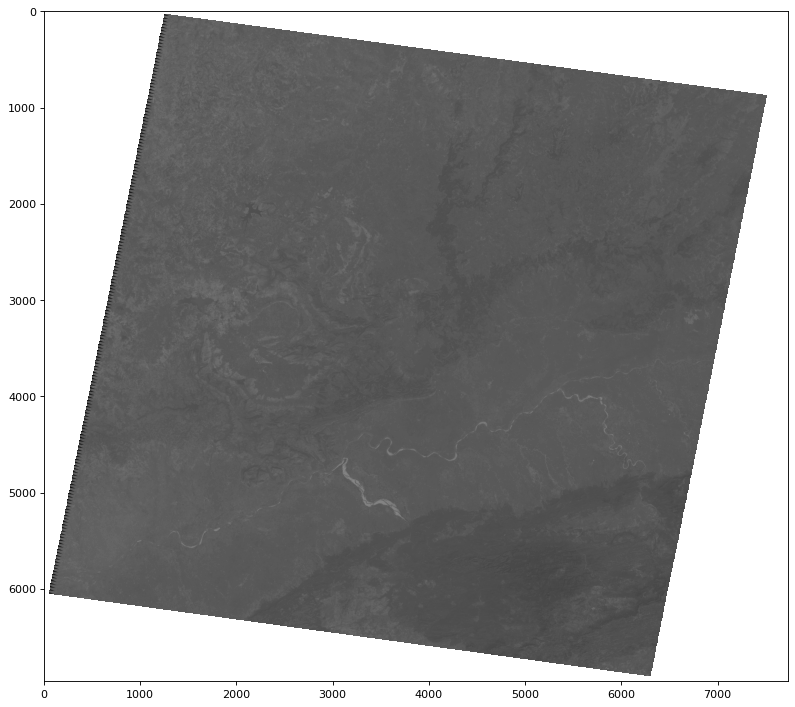

In [11]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(new_data_array,cmap='gray')

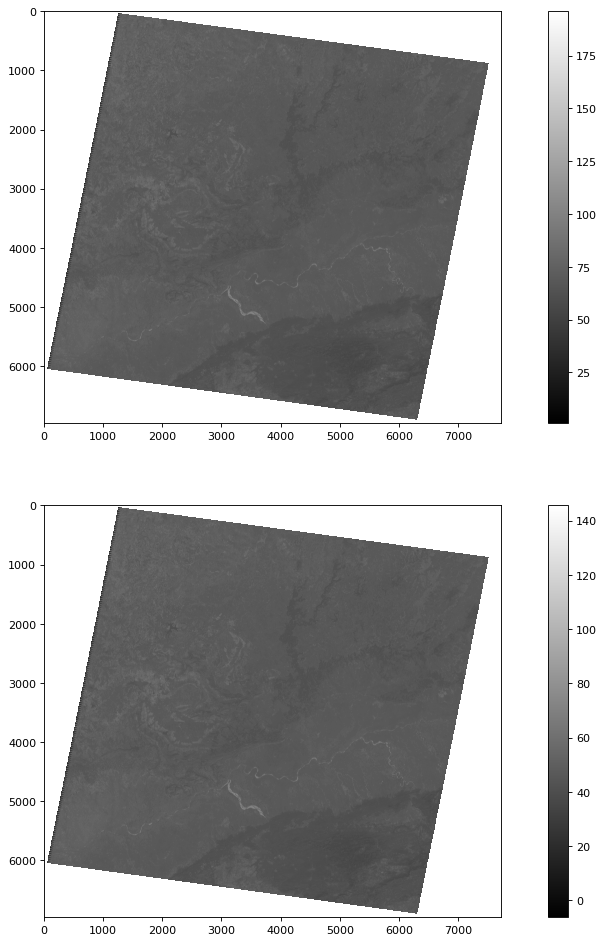

In [14]:
fig, ax = plt.subplots(2 ,1,figsize=(15,15), dpi =80)
#fig(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
ax[0].imshow(data_array, cmap ='gray',) #row=0, col=0
fig.colorbar(ax[ 0].imshow(data_array, cmap ='gray',) ,ax=ax[0])
ax[1].imshow(new_data_array, cmap = 'gray') #row=1, col=0
fig.colorbar(ax[1].imshow(new_data_array, cmap ='gray',) ,ax=ax[1])
plt.show()


## Radiance to ToA relectance

In [17]:
from math import cos
import math
d = float(Landsat7_mlt_dict['EARTH_SUN_DISTANCE '])
ESUN = 1970 
phi = 90 - float(Landsat7_mlt_dict['SUN_ELEVATION '])
new_data_array = np.empty_like(data_array)
for i,row in enumerate(data_array):
  for j, col in enumerate(row):
    if data_array[i][j] != np.nan:
      new_data_array[i][j] = np.pi *data_array[i][j] * d**2/ (ESUN *cos(phi*math.pi/180))

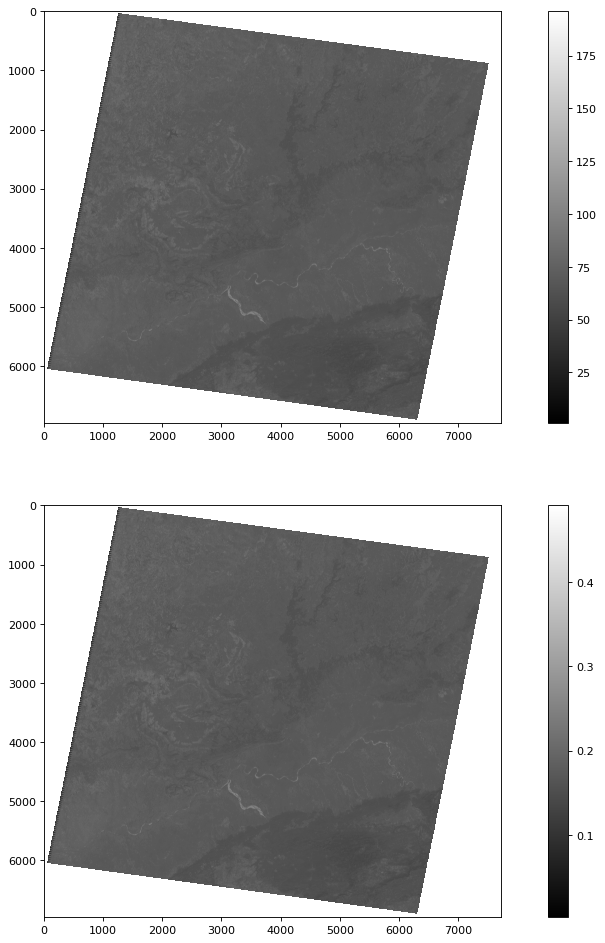

In [18]:
fig, ax = plt.subplots(2 ,1,figsize=(15,15), dpi =80)
#fig(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
ax[0].imshow(data_array, cmap ='gray',) #row=0, col=0
fig.colorbar(ax[ 0].imshow(data_array, cmap ='gray',) ,ax=ax[0])
ax[1].imshow(new_data_array, cmap = 'gray') #row=1, col=0
fig.colorbar(ax[1].imshow(new_data_array, cmap ='gray',) ,ax=ax[1])
plt.show()